In [1]:
import fly_plot_lib.plot as fpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import figurefirst as fifi
from scipy import stats
#import statsmodels.api as sm


2.2.4
recommended version: 1.1.1 or greater


In [7]:
#helper function for slicing means with standard errors
def slice_means_gs(df, index, time_key= "time stamp", start=-100, stop=3000):
    time_vec=[]
    mean_vec=[]
    upper_vec =[]
    lower_vec =[]
    df=df[df[time_key].between(start, stop)]
    times =df[time_key].unique()
    times_sorted=sorted(times)
    for i in times_sorted:
        dummy_df =df[df[time_key]==i]
        dummy_df=dummy_df[dummy_df['ground speed'].between(0, 2.0)]
        time_vec.append(i)
        mean = dummy_df[index].mean()
        upper= dummy_df[index].mean() + dummy_df[index].sem()*1.96
        lower= dummy_df[index].mean() - dummy_df[index].sem()*1.96
        mean_vec.append(mean)
        upper_vec.append(upper)
        lower_vec.append(lower)
    return time_vec, mean_vec, upper_vec, lower_vec

In [8]:
#Standardize a couple size things so figures all pltos come out the same
ms=4
lw=.5
fs=6
linew=.5
tl=3

In [2]:
orco= pd.read_csv('../trimmed_data/main/Orco_CsChrimson_still_air_merged.csv')
no_opto= pd.read_csv('../trimmed_data/supp/no_wind_no_grid_orco.csv')

In [10]:
orco100=orco[orco['duration']==100]
orco0=orco[orco['duration']==0]

no_opto100=no_opto[no_opto['duration']==100]
no_opto0=no_opto[no_opto['duration']==0]

In [11]:
orco100['ground speed']=(orco100['xvel']**2+orco100['yvel']**2)**0.5
orco0['ground speed']=(orco0['xvel']**2+orco0['yvel']**2)**0.5
no_opto100['ground speed']=(no_opto100['xvel']**2+no_opto100['yvel']**2)**0.5

In [12]:
no_opto=no_opto[no_opto['time stamp'].between(-100, 3000)]

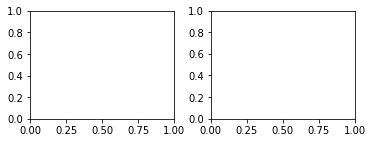

In [129]:
#Fifi initiatialization
template='../figure_first_templates/altitude_control.svg'
layout =fifi.svg_to_axes.FigureLayout(template, autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [131]:
ax=layout.axes[('z', 'grid')]

In [132]:
#Grab population mean and error boundaries for both flash and sham subsets for orco flies for altitude
t, m, u, l= slice_means_gs(orco100, 'z')
t0, m0, u0, l0=slice_means_gs(orco0, 'z')

In [133]:
ax.plot(t, m, color = 'red', label = 'Orco>csChrimson', linewidth =.5)
ax.plot(t0, m0, color ='k', label = 'Control', linewidth=.5)
#ax.set_ylabel("Ground Speed (m/s)")
ax.fill_between(t0, u0, l0, color = 'k', alpha = 0.2, label = '', linewidth =0)
ax.fill_between(t, u, l, color = 'red', alpha = 0.2, label = '', linewidth =0)
ax.set_xlim(-100, 3000)
ax.axvspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],xticks=[0, 675, 3000], yticks=[0, .5], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


In [134]:
ax=layout.axes[('z', 'no_grid')]

In [135]:
#Grab population mean and error boundaries for both flash and sham subsets for orco flies for altitude
t, m, u, l= slice_means_gs(no_opto100, 'z')
t0, m0, u0, l0=slice_means_gs(no_opto0, 'z')

In [136]:
ax.plot(t, m, color = 'red', label = 'Orco>csChrimson', linewidth =.5)
ax.plot(t0, m0, color ='k', label = 'Control', linewidth=.5)
#ax.set_ylabel("Ground Speed (m/s)")
ax.fill_between(t0, u0, l0, color = 'k', alpha = 0.2, label = '', linewidth =0)
ax.fill_between(t, u, l, color = 'red', alpha = 0.2, label = '', linewidth =0)
ax.set_xlim(-100, 3000)
ax.axvspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],xticks=[0, 675, 3000], yticks=[0, .5], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


In [137]:
layout.append_figure_to_layer(layout.figures['z'], 'z', cleartarget=True)
layout.write_svg(template)

20230717


set(['20230717', '20230718'])
